# Decision Trees

## Laden der Bilder

In [14]:
import os
import pandas as pd

# Setze das Verzeichnis mit den Bildern
data_dir = "images/archive/bloodcells_dataset"

# Initialisiere leere Listen für Dateipfade und Labels
filepaths = []
labels = []

# Gehe durch die Unterordner im data_dir
for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    
    # Gehe durch die Dateien im Unterordner
    for filename in os.listdir(subdir_path):
        filepath = os.path.join(subdir_path, filename)
        
        # Füge den Dateipfad und das Label zur Liste hinzu
        filepaths.append(filepath)
        labels.append(subdir)

# Erstelle einen DataFrame mit den Dateipfaden und Labels
df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

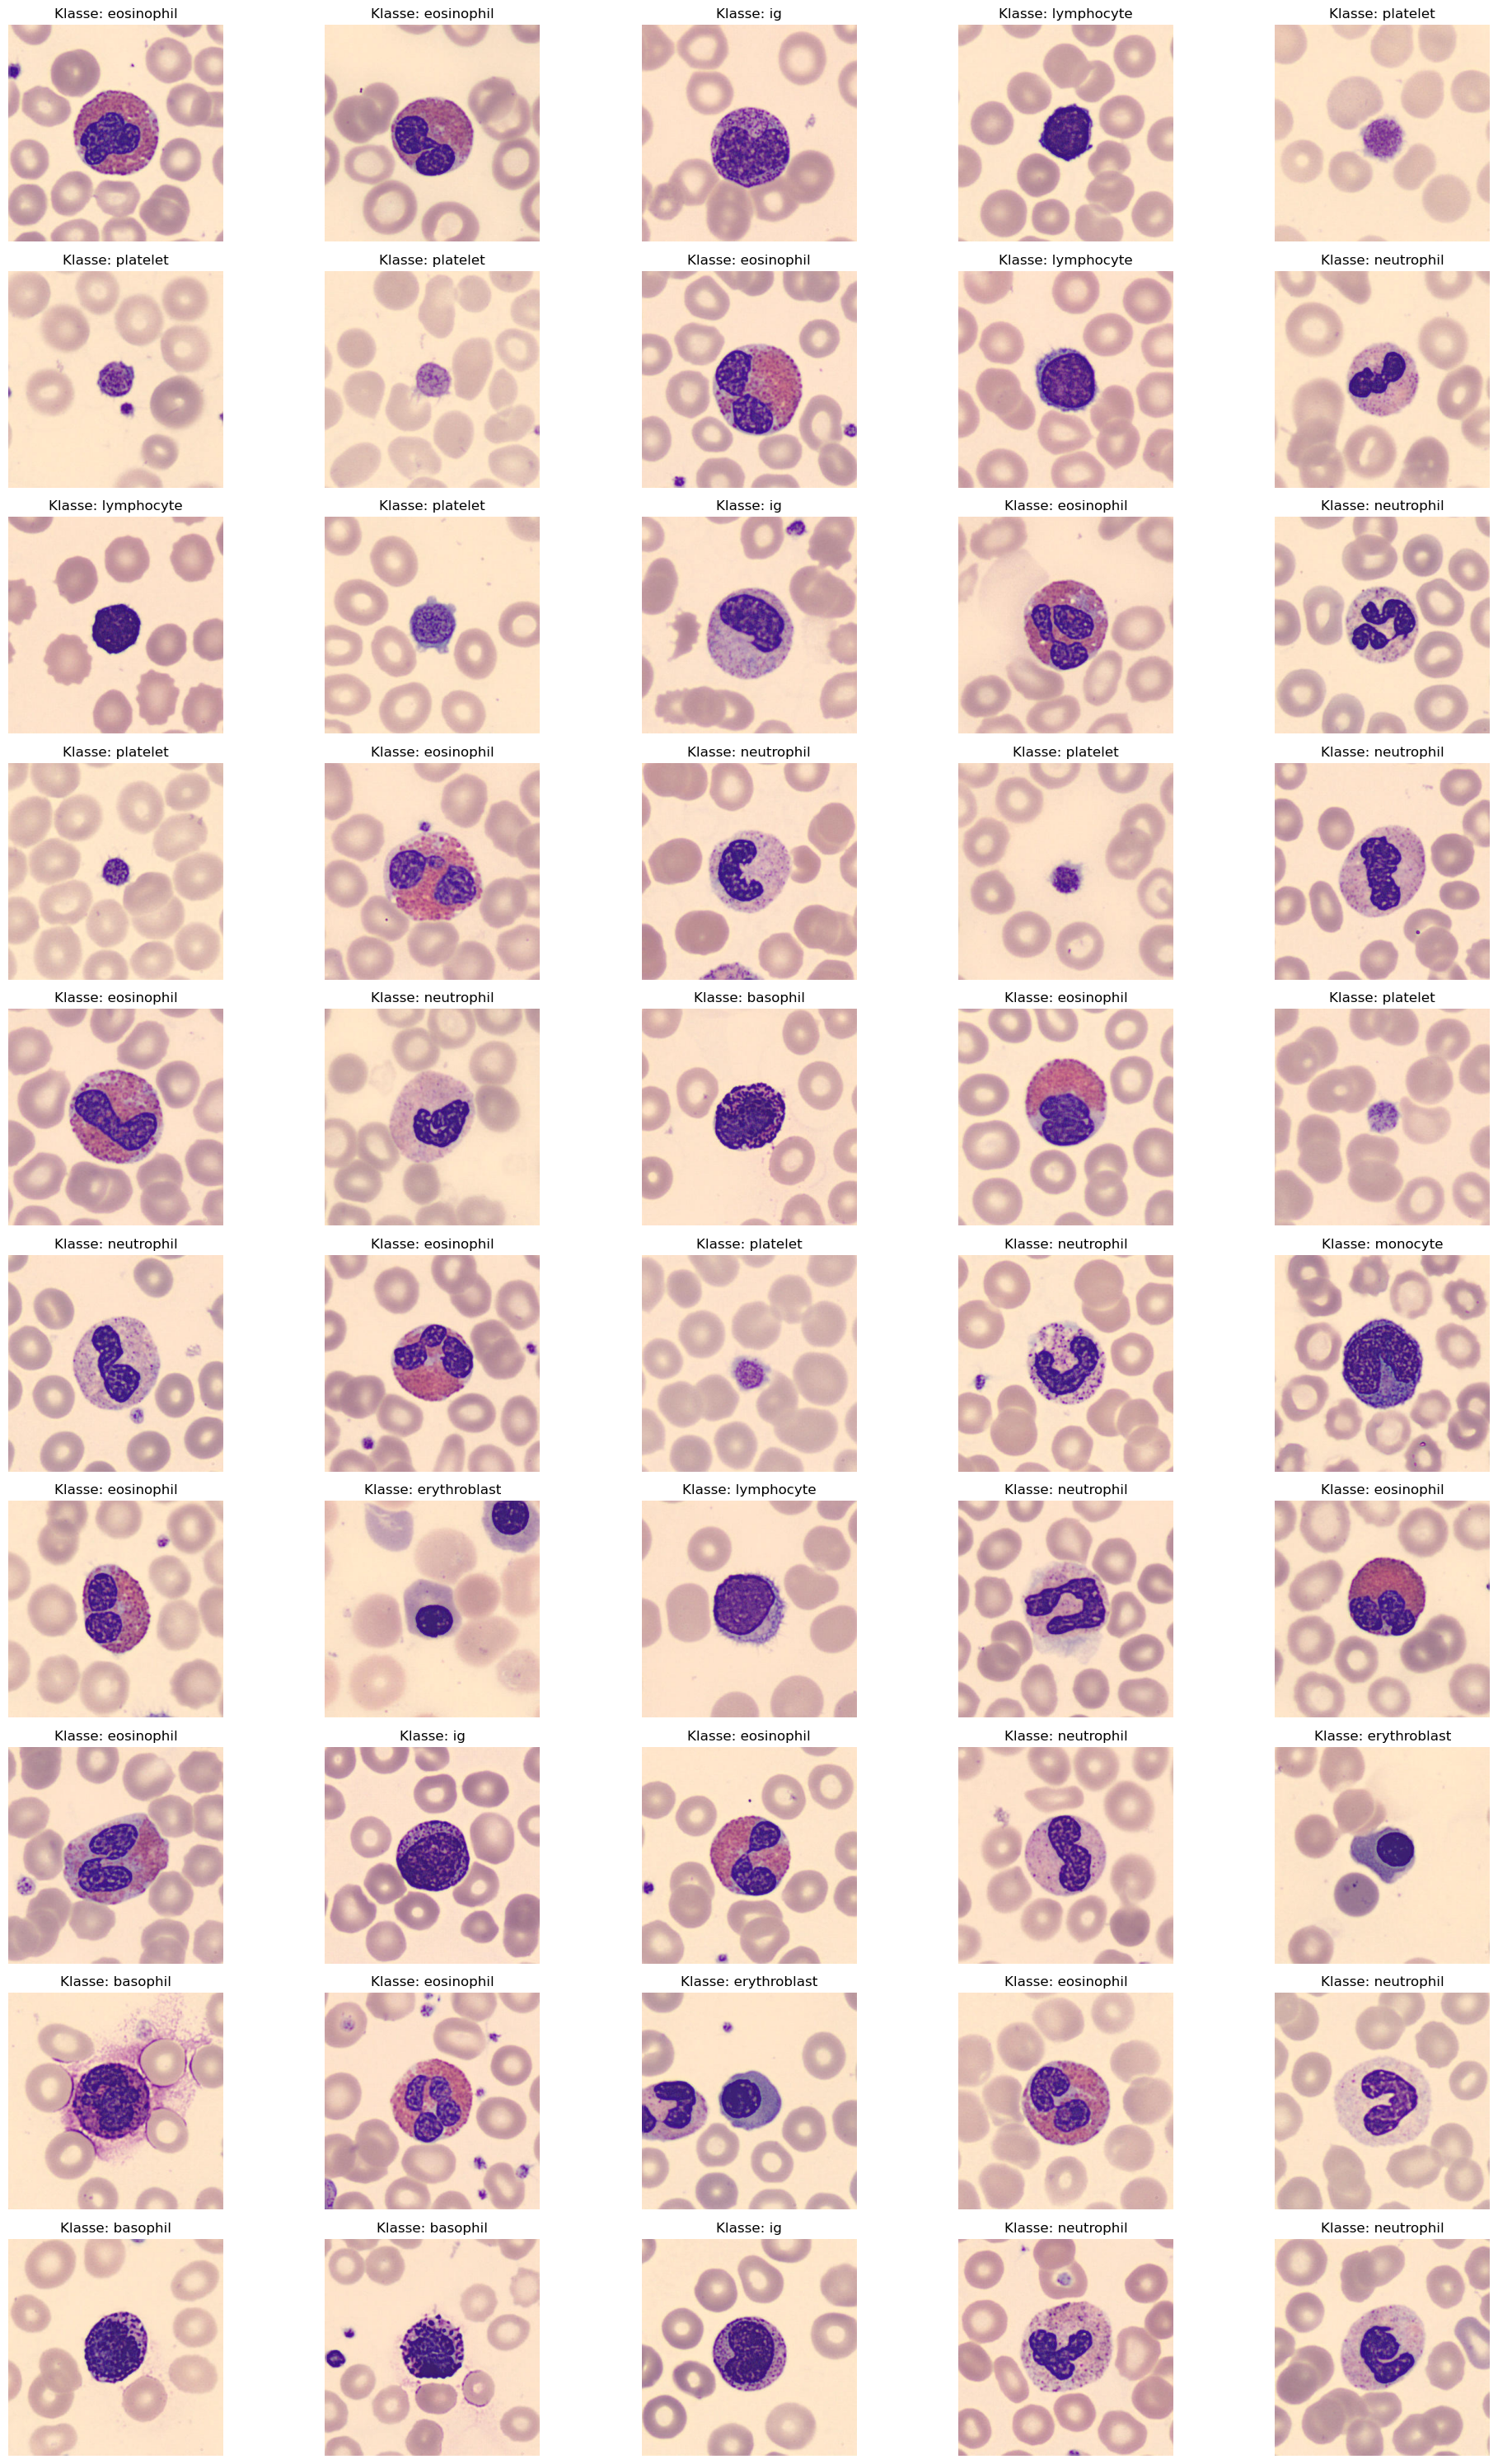

In [22]:
import cv2
import random
import matplotlib.pyplot as plt

# Zufällige 50 Indizes auswählen
random_indices = random.sample(range(len(df)), 50)

# Initialisiere eine leere Liste für die Bilder
images = []

# Bilder laden
for idx in random_indices:
    img_path = df.loc[idx, 'filepaths']
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)

# Erstelle ein 10x5 Raster
fig, axes = plt.subplots(10, 5, figsize=(20, 30))

# Fülle das Raster mit den Bildern
for i in range(10):
    for j in range(5):
        idx = i * 5 + j
        axes[i, j].imshow(images[idx])
        axes[i, j].set_title(f"Klasse: {df.loc[random_indices[idx], 'labels']}")
        axes[i, j].axis('off')

# Einstellungen anpassen für bessere Darstellung
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()

# Zeige das Raster an
plt.show()

## Umwandlung

In [24]:
# Definiere die Batch-Größe
batch_size = 100

# Initialisiere leere Liste für die geflatten Bilder
flattened_images = []

# Iteriere über die Bilder im DataFrame in Chargen
for start in range(0, len(df), batch_size):
    end = start + batch_size
    batch_df = df.iloc[start:end]
    
    for idx, row in batch_df.iterrows():
        img_path = row['filepaths']
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Lade das Bild in Graustufen
        flattened_img = img.flatten()  # Flatten des Bildes
        flattened_images.append(flattened_img)

# Erstelle einen DataFrame mit den geflatten Bildern
flattened_df = pd.DataFrame(flattened_images)

# Füge die Labels hinzu
flattened_df['labels'] = df['labels']

MemoryError: 